<img src=images/MovieBanner.jpg>

# Recommendations for Microsoft's Brand New Movie Studio

**Authors:** Dietrich Nigh, Annie Zheng, Paul Schulken
***

## Overview

With the return of theatrical movie releases, in addition to the increase in streaming video content, Microsoft has expressed interest in creating their own movie studio. To maximize their chances of success, they have requested an analysis of the best performing movies at the box office. This analysis explored the factors that tend to make a movie commercially and critically successful. The relationship between box office results and genre, votes received for rating, and release dates were analyzed to determine what combinations were most likely to produce popular and profitable movies. 

## Business Problem

Creating a movie studio is a big undertaking and therefore requires a good amount of forethought. Our statistical analysis of variables will assist Microsoft stakeholders in determining the direction of their studio. Like any business, the studio must make money to remain operational so the box office results were focused on from the beginning. Profitability, genre, seasonality, and runtimes were the focal points of the analysis and were deemed to be vital to the success of a movie and the studio itself. What makes a high grossing movie? The team analyzed the gross profits compared to movie genres that most people took interest in as well as seasonality to determine the best release time. We also analyzed run times of movies to determine whether the length of a movie would affect a movie's likability. By determining the factors most correlated with box office success, Microsoft's new studio can use the results to produce movies with confidence that they'll be profitable and well received.

## The Bottom Line

1. Movie creation should focus on Animation. 

2. Release in Summer or it could be a bummer. Alternatively, when the weather is lackluster, release a winter blockbuster. 

3. Short or long, run times can't go wrong. 

<img src=images/FrozenSummer.png width="600" height="240">

## Data Understanding

The data used in this analysis was taken from [IMDB](https://www.imdb.com/), [The Numbers](https://www.the-numbers.com/), and [The Movie DB](https://www.themoviedb.org/?language=en-US), websites that track multiple metrics related to movies and allow users to review and discuss these movies. The data files provided release dates, genre information, vote numbers, run time, production budgets, and domestic and worldwide gross figures for thousands of movies. The target variables were the profits which laid a foundation for the rest of the analysis that dove deeper into their respective genres and release dates. The dataset primarily contains quantitative numerical data, with the instance of qualitative categorical data of genres. By representing profit, vote counts, and release years and months as numbers, statistical analysis and conditional filtering could be performed.

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [2]:
# Suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
# Load data set 'tmdb.movies.csv.gz' with data obtained from TMDB
movies = pd.read_csv('zippedData//tmdb.movies.csv.gz')

# Load dataset 'tn.movie_budgets.csv.gz' with data obtained from The-Numbers
movie_budgets = pd.read_csv('zippedData//tn.movie_budgets.csv.gz')

# Connect and read in SQLite3 database
conn = sqlite3.connect('zippedData/im.db')

## Methods

In order to perform our analysis, our team merged several tables together to obtain a full dataset. In doing so, we accumulated columns that contained duplicate or unnecessary data to our analysis and those columns were dropped. Data such as the numeric genre codes were changed to the respective genre titles that correlated to The Movie Database's database in order to gain a better understanding of movie genre breakdowns. Lastly, columns for Profit and Profit:Budget Ratio were calculated to be used in the visualizations.

In [4]:
# Merge the 'movie_basics' and 'movie_rating' tables together with a left join to create 'basics_and_ratings' 
# dataframe
basics_and_ratings = pd.read_sql("""
SELECT *
FROM movie_basics
LEFT JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
    """, conn )

The movie_basics and movie_ratings tables were selected as they contained the most relevant product data for our analysis such as the run times of each movie and number of votes collected from movie watchers.

In [5]:
# Merge movie_budgets and movies with an inner join to create a 'masterdf' dataframe
masterdf = movie_budgets.merge(movies, how='inner', left_on='movie', right_on='title', \
                               suffixes=('_budgets', '_movies'))

In [6]:
# Merge the 'basics_and_ratings' and 'masterdf' dataframes with an inner join to create a 'new_masterdf' dataframe
new_masterdf = masterdf.merge(basics_and_ratings, how='inner', left_on='movie', right_on='primary_title', \
                              suffixes=('_master','_database')).drop_duplicates(subset='movie')

In [7]:
new_masterdf.head()

,id_budgets,release_date_budgets,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_movies,original_language,...,vote_count,movie_id,primary_title,original_title_database,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",6,"[28, 12, 14, 878]",19995,en,...,18676,tt1775309,Avatar,Abatâ,2011,93.00000,Horror,tt1775309,6.10000,43.00000
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2470,"[12, 28, 14]",1865,en,...,8571,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.00000,"Action,Adventure,Fantasy",tt1298650,6.60000,447624.00000
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",14169,"[28, 12, 878]",99861,en,...,13457,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00000,"Action,Adventure,Sci-Fi",tt2395427,7.30000,665594.00000
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",23811,"[12, 28, 14]",299536,en,...,13948,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.00000,"Action,Adventure,Sci-Fi",tt4154756,8.50000,670926.00000
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",20623,"[28, 12, 14, 878]",141052,en,...,7510,tt0974015,Justice League,Justice League,2017,120.00000,"Action,Adventure,Fantasy",tt0974015,6.50000,329135.00000


In [8]:
# Drop columns with repeated information or information not relevant to analysis from the datasets
new_masterdf.drop(['id_movies', 'Unnamed: 0', 'original_title_database', 'movie_id', 'primary_title', 'title', \
                   'id_budgets', 'start_year', 'original_title_master', 'release_date_budgets', \
                   'vote_count', 'vote_average', 'popularity'], axis=1, inplace=True)

The following columns were dropped from the dataset for the following reasons:
* Columns 'id_movies', 'movie_id', and 'id_budgets' were the unique movie identification numbers from their respective datasets. These are no longer relevant identifers as each dataset has conflicting identification numbers and movies will be referenced by movie title rather than ID number. 
* Columns 'original_title_database', 'movie_id', 'primary_title', 'title', and 'original_title_master' contained repeated data of the movie title. 
* Column 'Unnamed: 0' was the index  from 'movies' dataset. 
* Columns 'start_year'and 'release_date_budgets' contained repeated information regarding release dates. 
* Columns vote_count contains repeated informations as the number of votes column we will be analyzing.
* Columns vote_average and popularity were not being analyzed to focus on the number of votes column. 

In [9]:
# Define function to remove '$' and ',' from dataset
def remove_dollarsigncommas(data, column):
    data[column] = data[column].str.replace(',','')
    data[column] = data[column].str.replace('$','')
    return print('all done') ; print(data[column].head())

# Remove '$' and ',' from relevant columns
remove_dollarsigncommas(new_masterdf, 'production_budget')
remove_dollarsigncommas(new_masterdf, 'worldwide_gross')
remove_dollarsigncommas(new_masterdf, 'domestic_gross')

all done
all done
all done


/var/folders/v0/p588qkrd5kb8kdnf_3zrlbm80000gn/T/ipykernel_12458/3923268237.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[column] = data[column].str.replace('$','')


In [10]:
# Cast the revelant columns as integers for data manipulation
new_masterdf[['production_budget', 'domestic_gross', 'worldwide_gross']] = new_masterdf \
[['production_budget', 'domestic_gross', 'worldwide_gross']].applymap(lambda x: int(x))

In [11]:
# Create 'release_month' column for data manipulation
new_masterdf['release_month'] = new_masterdf['release_date_movies'].map(lambda x: x[5:7])

# Create 'release_year' column for data manipulation
new_masterdf['release_year'] = new_masterdf['release_date_movies'].map(lambda x: int(x[:4]))

In [12]:
# Replace 'genre_ids' with respective TMDB genre names
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('28', 'Action')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('12', 'Adventure')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('16', 'Animation')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('35', 'Comedy')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('80', 'Crime')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('99', 'Documentary')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('18', 'Drama')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('10751', 'Family')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('14', 'Fantasy')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('36', 'History')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('27', 'Horror')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('10402', 'Music')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('9648', 'Mystery')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('10749', 'Romance')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('878', 'Science Fiction')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('10770', 'TV Movie')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('53', 'Thriller')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('10752', 'War')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('37', 'Western')

The corresponding genre id numbers and names information was sourced from [TMDB Genre Assignment](https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee).

In [13]:
# Create new columns breaking down the genre types of each movie
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].map(lambda x: x.lstrip('[').rstrip(']').split(','))

In [14]:
# Reset the index
new_masterdf.reset_index(inplace=True)

In [15]:
# Merging the genre breakdown data with the master dataset with an left join to create 'final_df' dataframe
final_df = new_masterdf.join(pd.DataFrame(new_masterdf.genre_ids.values.tolist()).add_prefix('genre_'), how='left', \
                             lsuffix='_votes')

# Reset the column labeled index
final_df.drop('index', axis=1, inplace=True)

# Find the amount of missing data from each column
final_df.isna().sum()/len(final_df)

# Drop all 'genre_' breakdown columns where majority of data was missing
final_df.drop(['genre_6','genre_5','genre_4','genre_3', 'genre_2'], axis=1, inplace=True)

# Drop the 'genres' column 
final_df.drop('genres', axis=1, inplace=True)

In [16]:
# Find the counts of unique values of the original_language
final_df['original_language'].value_counts()

# Drop the original_language column as majority of movies are in English
final_df.drop('original_language', axis=1, inplace=True)

The dataset was narrowed down to movies where the original language is English to focus on non-foreign movies.

In [17]:
# Get the descriptive statistics of the 'worldwide_gross' column
final_df['worldwide_gross'].describe()

# Filter dataset based on worldwide gross profits
final_df = final_df[final_df['worldwide_gross'] > 3541565]

# Filter dataset based on movies released within last 10 years of dataset
final_df = final_df[final_df['release_year'] >= 2009]

# Additional column of the Net Profits
final_df['net_profits'] = final_df['worldwide_gross'] - final_df['production_budget']

# Additional column of the Profit to Budget Ratio
final_df['profit_to_budget_ratio'] = final_df['net_profits'] / final_df['production_budget']

# View the genre_0 makeup percentage
(final_df.groupby('genre_0').count()/len(final_df)).sort_values('movie', ascending=False)

# Drop the movies whose genre makes up less than 1% of the data 
final_df = final_df.loc[final_df['genre_0'] != 'TV Movie']
final_df = final_df.loc[final_df['genre_0'] != 'Western']
final_df = final_df.loc[final_df['genre_0'] != 'Music']
final_df = final_df.loc[final_df['genre_0'] != 'War']
final_df = final_df.loc[final_df['genre_0'] != 'History']
final_df = final_df.loc[final_df['genre_0'] != 'Mystery']

final_df

,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,release_date_movies,runtime_minutes,averagerating,numvotes,release_month,release_year,genre_0,genre_1,net_profits,profit_to_budget_ratio
0,Avatar,425000000,760507625,2776345279,"[Action, Adventure, Fantasy, Science Fiction]",2009-12-18,93.00000,6.10000,43.00000,12,2009,Action,Adventure,2351345279,5.53258
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"[Adventure, Action, Fantasy]",2011-05-20,136.00000,6.60000,447624.00000,05,2011,Adventure,Action,635063875,1.54667
2,Avengers: Age of Ultron,330600000,459005868,1403013963,"[Action, Adventure, Science Fiction]",2015-05-01,141.00000,7.30000,665594.00000,05,2015,Action,Adventure,1072413963,3.24384
3,Avengers: Infinity War,300000000,678815482,2048134200,"[Adventure, Action, Fantasy]",2018-04-27,149.00000,8.50000,670926.00000,04,2018,Adventure,Action,1748134200,5.82711
4,Justice League,300000000,229024295,655945209,"[Action, Adventure, Fantasy, Science Fiction]",2017-11-17,120.00000,6.50000,329135.00000,11,2017,Action,Adventure,355945209,1.18648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,Graduation Day,250000,23894000,23894000,[],2015-01-01,75.00000,5.00000,52.00000,01,2015,,None,23644000,94.57600
1723,Sleight,250000,3930990,3934450,"[Drama, Thriller, Action, Science Fiction]",2017-04-28,89.00000,5.90000,7074.00000,04,2017,Drama,Thriller,3684450,14.73780
1724,Like Crazy,250000,3395391,3728400,"[Drama, Romance]",2011-10-28,86.00000,6.70000,55841.00000,10,2011,Drama,Romance,3478400,13.91360
1725,Cube,250000,489220,8969065,[],2014-05-02,113.00000,NaN,NaN,05,2014,,None,8719065,34.87626


The dataset was filtered for movies that had worldwide gross profit greater than the those within the 25th quartile in order to analyze the movies that exceled and profited to a worldwide audience rather than domestically. Our focus were the top grossing movies. The dataset was filtered to only the most recent decade of movies (2009-2019) in order to keep the analysis focused on current movie metrics. The movie genres that made up less than 1% of the data were dropped to prevent outliers from affecting the overall data. Identifying trends in the movies that remain in the data set allowed us to base our recommendations on the most well received movies.

#### Limitations
   * Financial data not adjusted for inflation
   * Missing data
   * Data Pollution
   * Cost of acquiring pre-existing intellectual property not factored in

## Diving into Analysis & Modeling

Charts were created to provide a visual reference for the master data set. Charting the highest grossing movies compared to their genre, release month, runtime, and number of votes allowed for quick identification of the most frequently occuring variables in successful movies. Statistical measures like the mean and bottom 25% quartile were applied to find average values across the dataset and remove the worst performing movies. 

### Genre Analysis: The Battle of Genres

In [18]:
#Create sub-dataframe with  the median values of the dataset grouped by the genre_0 breakdown
sortgenres = final_df.groupby('genre_0').median()
sortgenres.sort_values('worldwide_gross', ascending=False)

,production_budget,domestic_gross,worldwide_gross,runtime_minutes,averagerating,numvotes,release_year,net_profits,profit_to_budget_ratio
genre_0,,,,,,,,,
Animation,80000000.00000,107514024.00000,272099539.50000,95.50000,6.80000,74214.50000,2013.00000,162347671.50000,1.89767
Adventure,95000000.00000,80069458.00000,215098356.00000,109.00000,6.45000,91149.50000,2015.00000,122344255.00000,1.61933
Fantasy,60000000.00000,54858851.00000,162502774.00000,102.00000,6.00000,97654.50000,2013.00000,50818912.00000,1.29948
Action,63000000.00000,56117548.00000,150422946.00000,111.00000,6.40000,131043.00000,2014.00000,85569212.00000,1.43292
Science Fiction,84000000.00000,62116418.00000,143735423.00000,106.00000,6.60000,187884.50000,2013.00000,75544366.50000,1.72701
Family,38000000.00000,48275979.50000,81795562.00000,92.00000,6.35000,20381.00000,2014.00000,44007796.00000,1.89451
Crime,29000000.00000,31975243.00000,59049643.00000,112.00000,6.60000,93618.00000,2014.00000,33987337.50000,1.19840
Horror,10000000.00000,28369816.50000,57946309.00000,92.00000,5.75000,51482.50000,2014.00000,39902732.00000,4.23365
Comedy,22000000.00000,36796296.50000,55674516.00000,102.00000,6.20000,54421.00000,2013.00000,28276772.00000,1.57226


The median values were selected rather than the mean due to the outliers having adverse impact on our analysis.

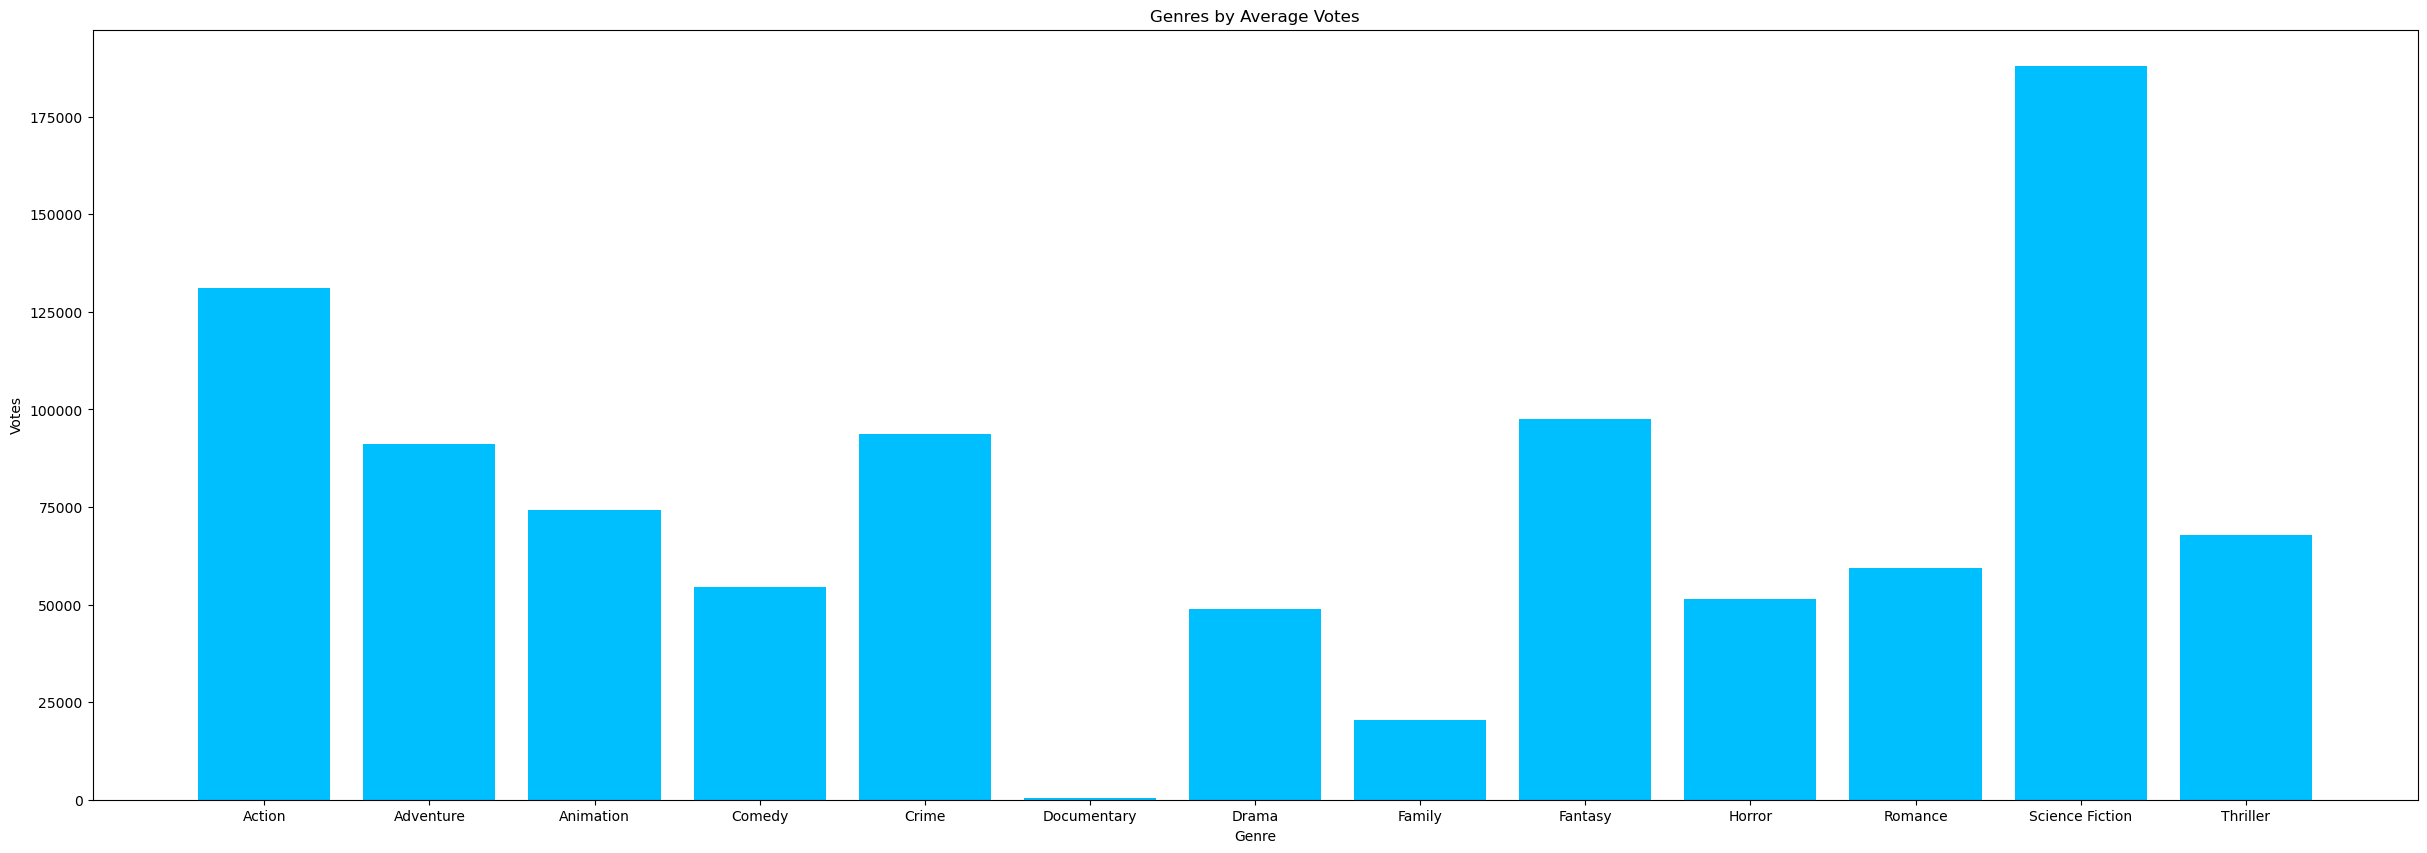

In [19]:
# Plot the Average Vote Count by Release by Genre
fig, ax = plt.subplots(figsize= (30, 10))
ax.set_title('Genres by Average Votes')

#Filter out the blank genre row from the column
ax.bar( sortgenres.iloc[1:].index, sortgenres['numvotes'].iloc[1:], color='deepskyblue') 
ax.set_ylabel('Votes')
ax.set_xlabel('Genre');

Science Fiction movies leads the audience vote count by far. This genre in particular as of late have been on the rise. However, this can be attributed to the recent surge of movies related to comics, such as Avengers. 

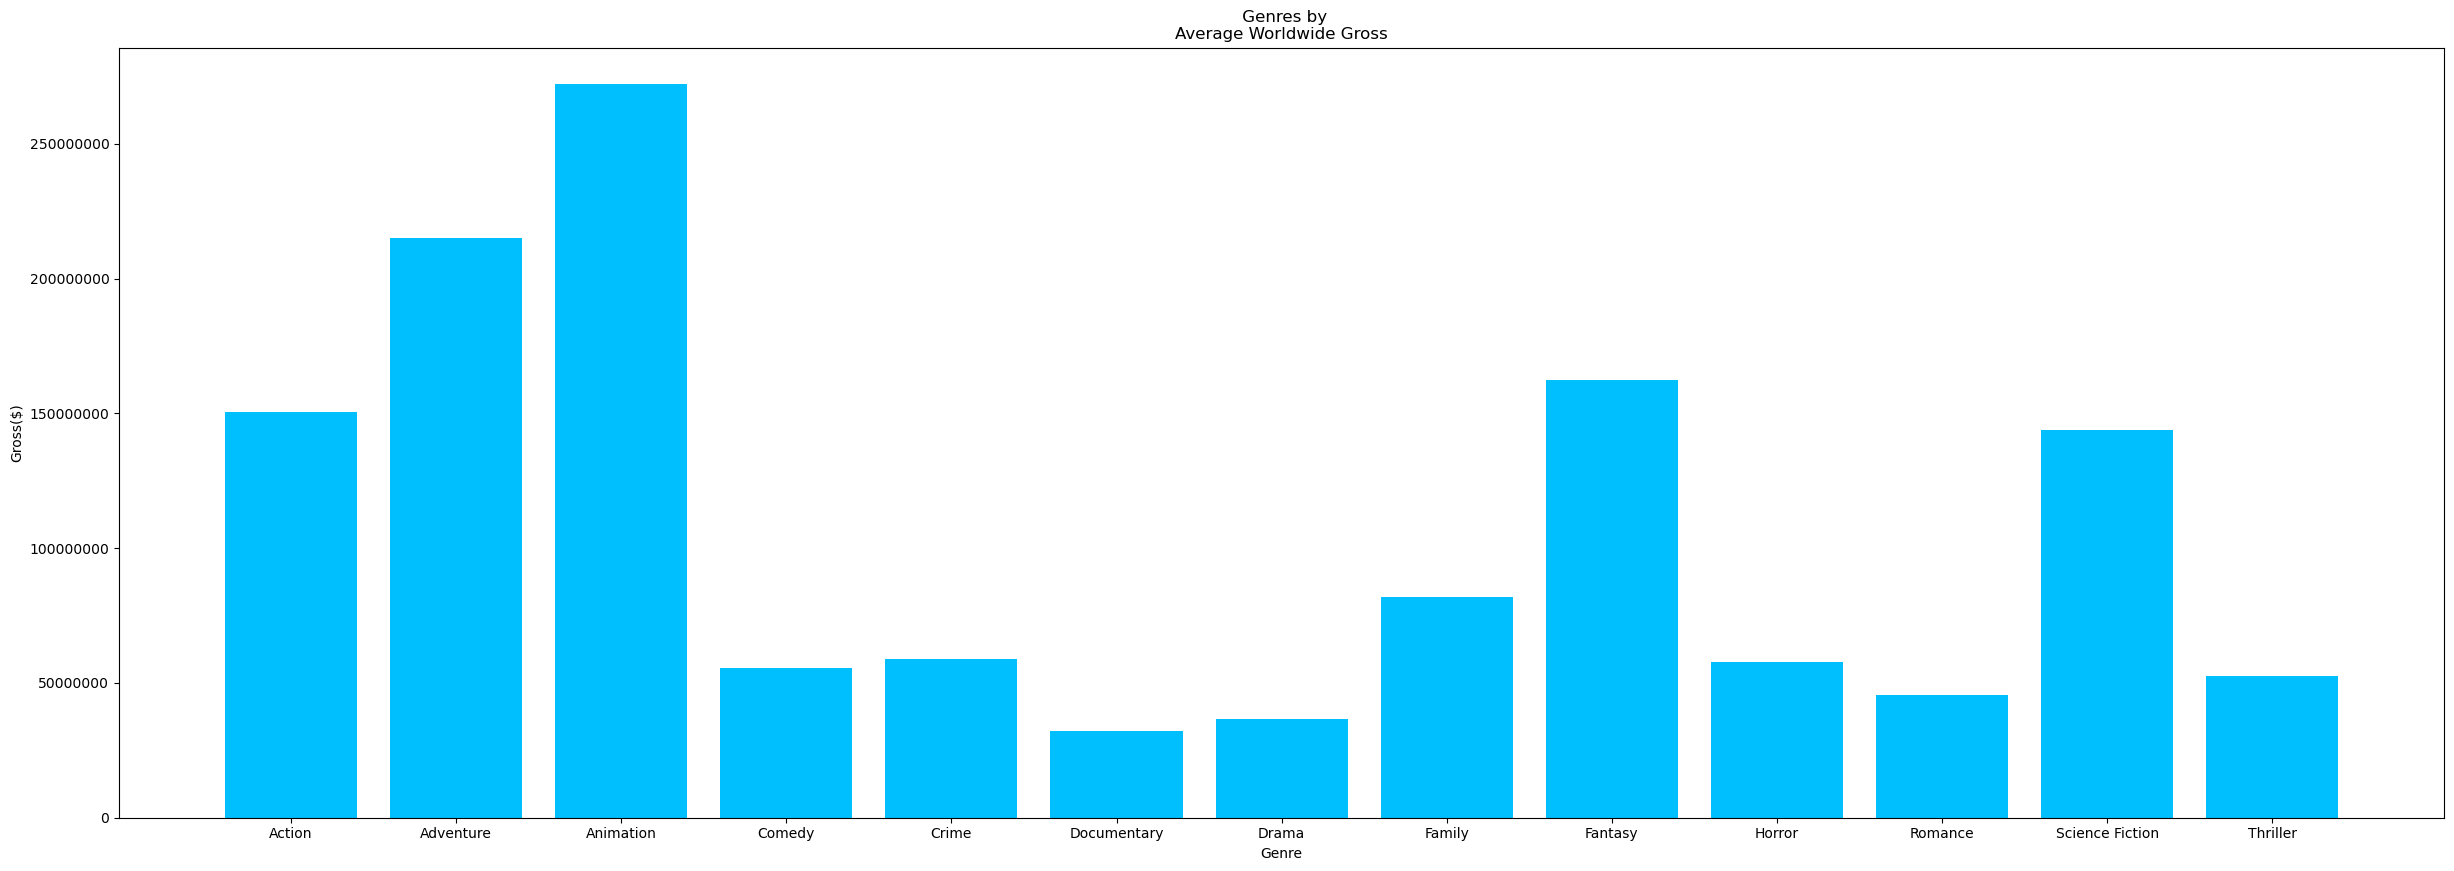

In [20]:
# Plot the Average Worldwide Gross by Genre
fig, ax = plt.subplots(figsize= (30, 10))
ax.set_title(' Genres by\nAverage Worldwide Gross')

# Filter out the blank genre row from the column
ax.set_ylabel('Gross($)')
ax.bar( sortgenres.iloc[1:].index, sortgenres['worldwide_gross'].iloc[1:], color='deepskyblue') 
ax.set_ylabel('Gross($)')
ax.set_xlabel('Genre')
ax.ticklabel_format(style='plain', axis='y')
plt.show()

We see that Animation movies lead the running for the highest average worldwide grossing genre, followed by Adventure. 

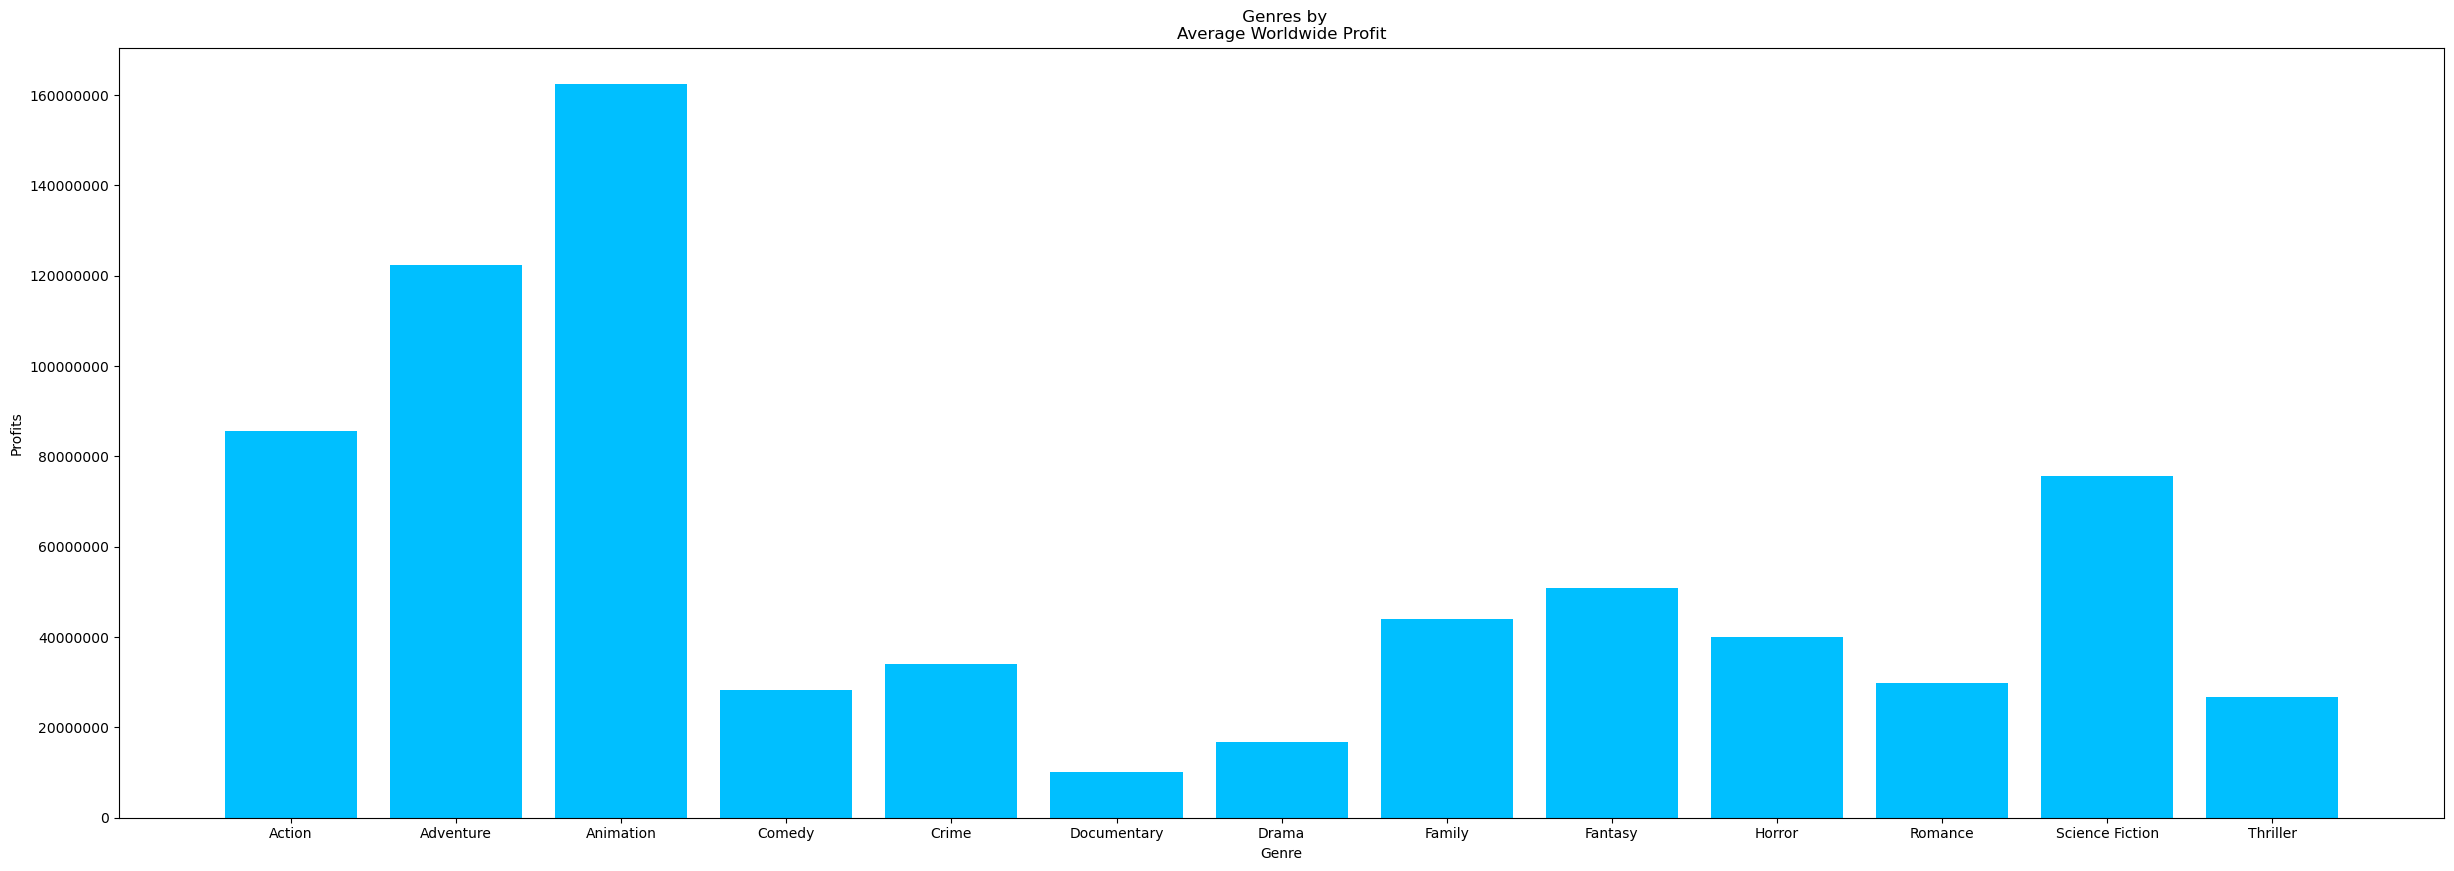

In [21]:
# Plot the Average Worldwide Profit by Genre
fig, ax = plt.subplots(figsize= (30, 10))
ax.set_title(' Genres by\nAverage Worldwide Profit')

# Filter out the blank genre row from the column
ax.bar( sortgenres.iloc[1:].index, sortgenres['net_profits'].iloc[1:], color='deepskyblue')
ax.set_ylabel('Profits')
ax.set_xlabel('Genre')
ax.ticklabel_format(style='plain', axis='y')
plt.show()

It's clear that Animation tops the genre charts when it comes to average worldwide profits. Within 2009 and 2019, it has amassed more than 160 million dollars on average in worldwide profits than other genres. It headlines as one of the most profitable genres by far in comparison.

In [22]:
# Create sub-dataframe of the top 5 highest median worldwide grossing primary genres
topfivegenresbywwgross = sortgenres.sort_values('worldwide_gross', ascending=False).head()
topfivegenresbywwgross

,production_budget,domestic_gross,worldwide_gross,runtime_minutes,averagerating,numvotes,release_year,net_profits,profit_to_budget_ratio
genre_0,,,,,,,,,
Animation,80000000.00000,107514024.00000,272099539.50000,95.50000,6.80000,74214.50000,2013.00000,162347671.50000,1.89767
Adventure,95000000.00000,80069458.00000,215098356.00000,109.00000,6.45000,91149.50000,2015.00000,122344255.00000,1.61933
Fantasy,60000000.00000,54858851.00000,162502774.00000,102.00000,6.00000,97654.50000,2013.00000,50818912.00000,1.29948
Action,63000000.00000,56117548.00000,150422946.00000,111.00000,6.40000,131043.00000,2014.00000,85569212.00000,1.43292
Science Fiction,84000000.00000,62116418.00000,143735423.00000,106.00000,6.60000,187884.50000,2013.00000,75544366.50000,1.72701


/var/folders/v0/p588qkrd5kb8kdnf_3zrlbm80000gn/T/ipykernel_12458/1314362450.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.axes.set_xticklabels(genreinfo)


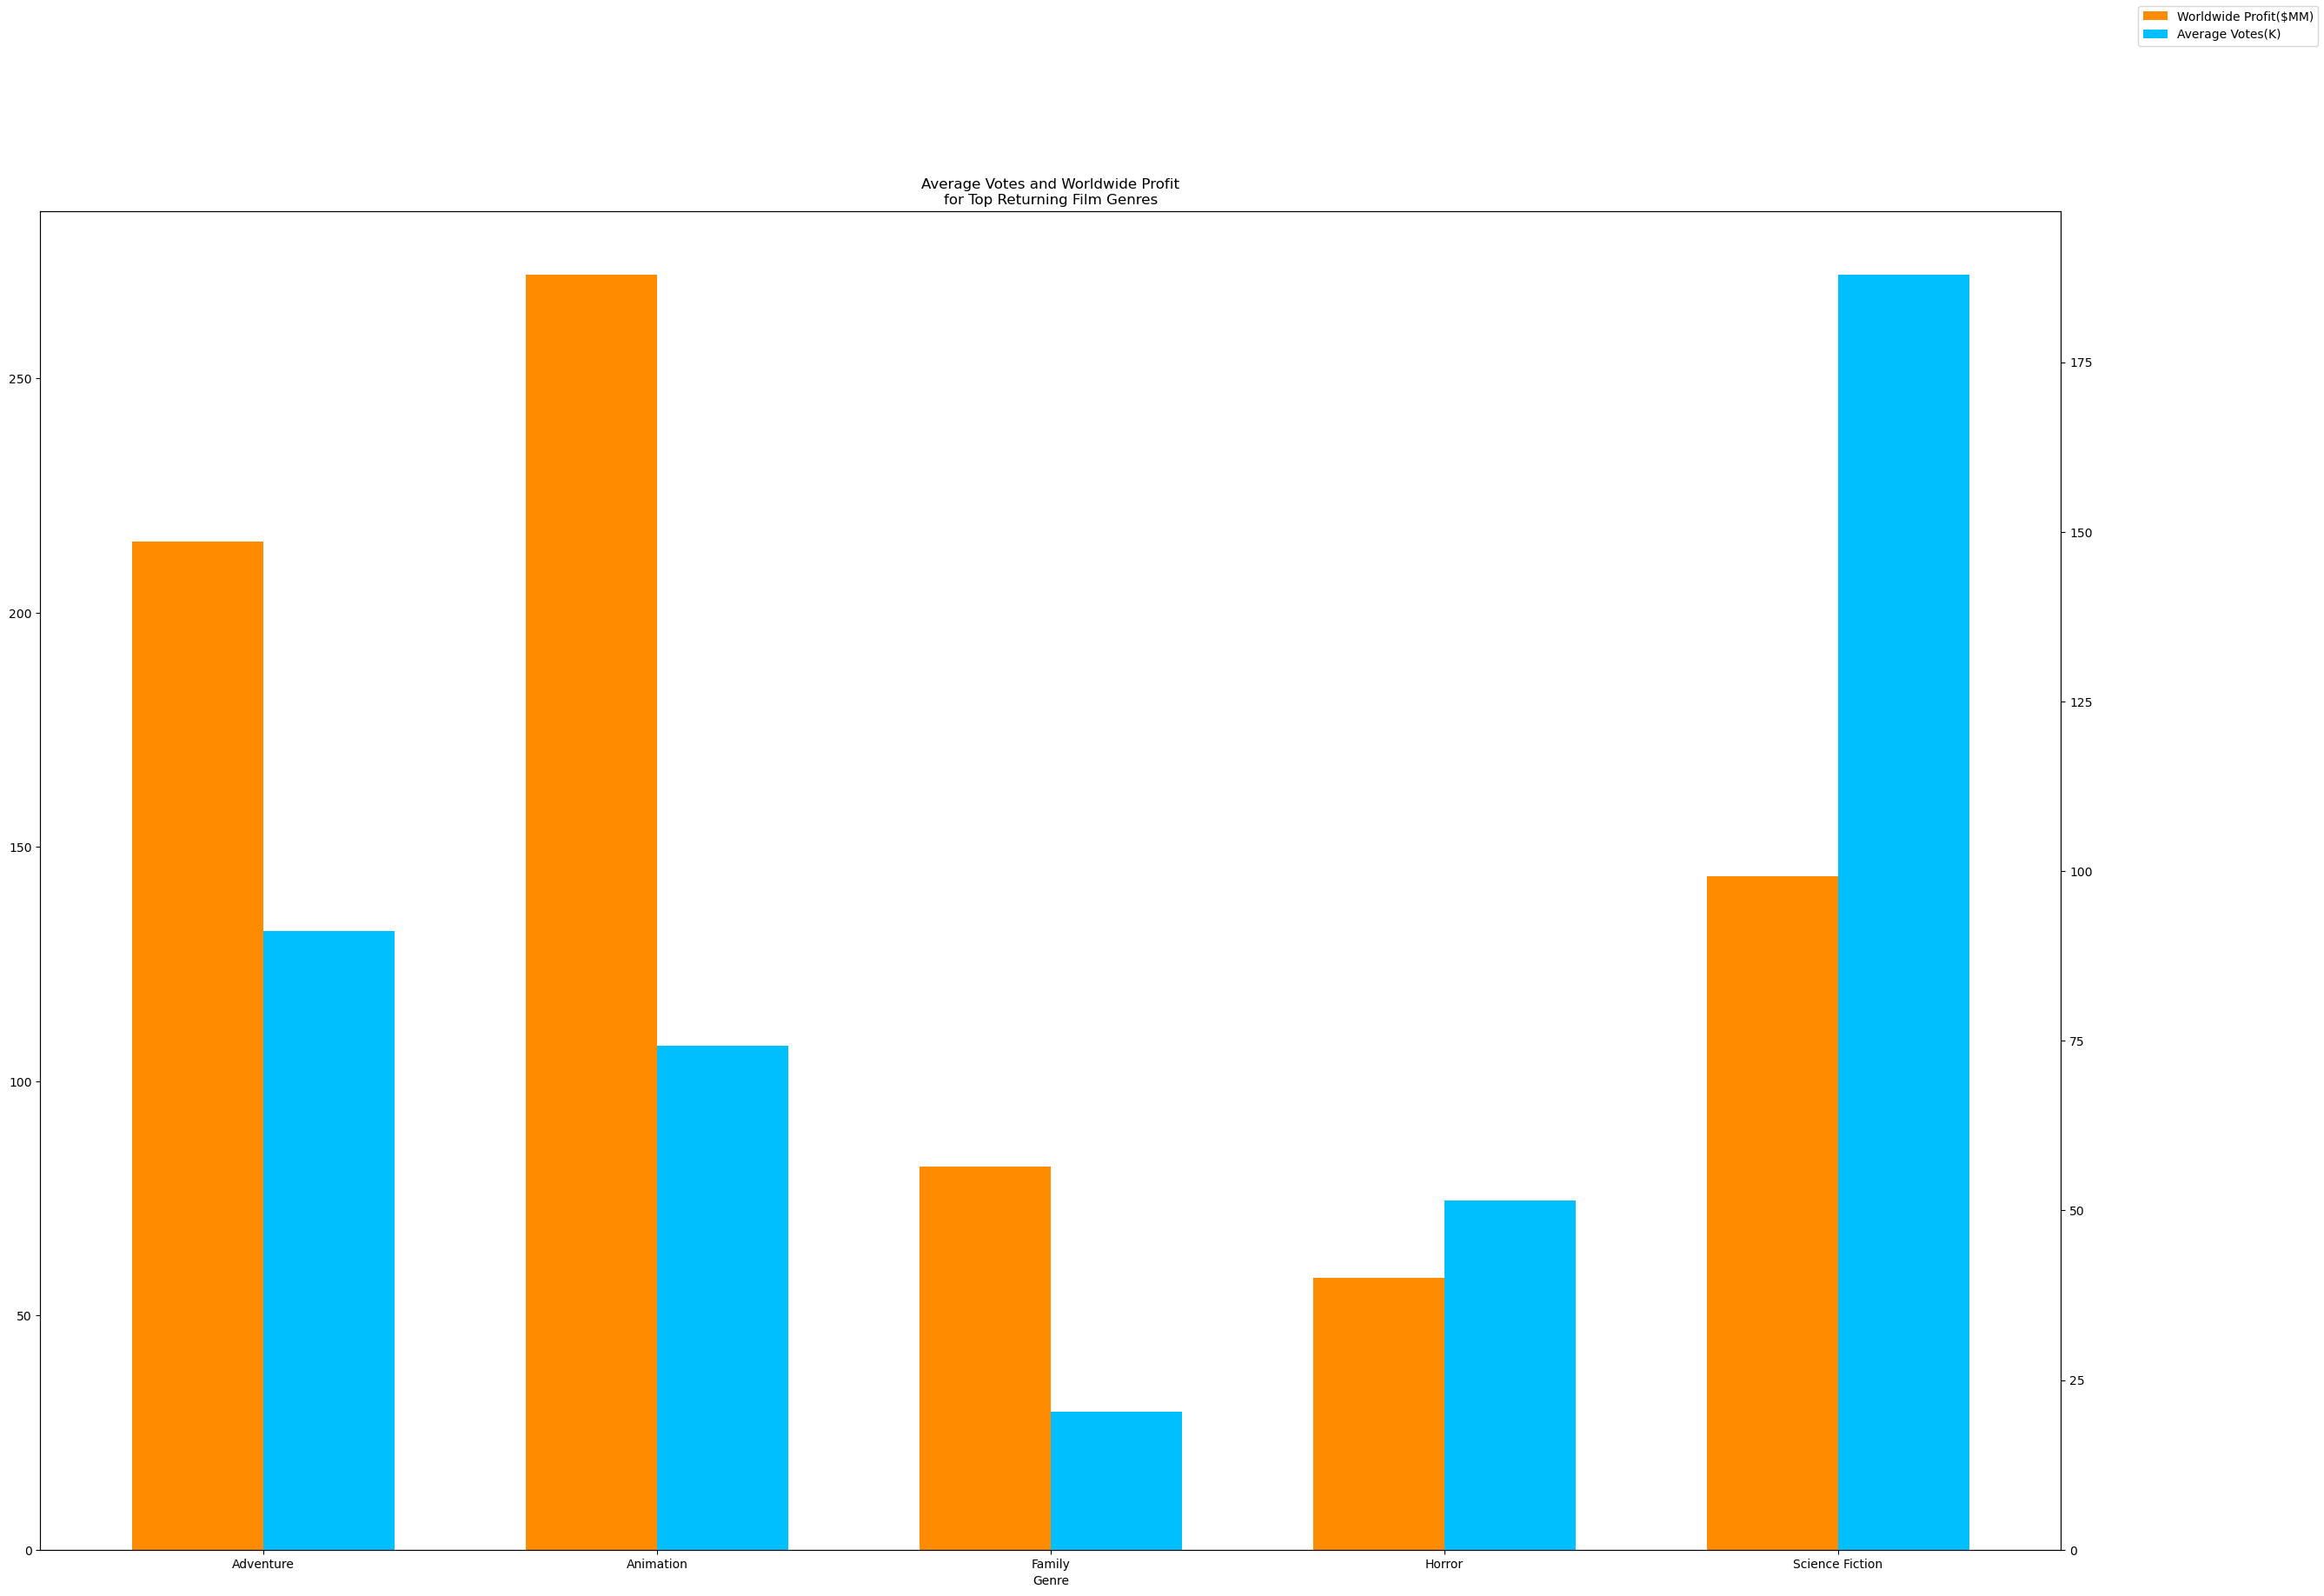

In [23]:
# Plot the Average Votes and Worldwide Profits for the Top 5 profitting primary genres
topfivegenresbywwgross = sortgenres.sort_values('profit_to_budget_ratio', ascending=False).head()
runtimeinfo = topfivegenresbywwgross['worldwide_gross'].sort_index()/1e6
numvoteinfo = topfivegenresbywwgross['numvotes'].sort_index()/1e3
indices = range(len(topfivegenresbywwgross))
genreinfo = topfivegenresbywwgross.sort_index().index
# Calculate optimal width
width = np.min(np.diff(indices))/3.

fig, ax1 = plt.subplots(figsize=(30,20))
ax1.bar(indices-width/2.,runtimeinfo,width,color='darkorange', label='Worldwide Profit($MM)')
ax2 = ax1.twinx()
ax2.bar(indices+width/2.,numvoteinfo,width,color='deepskyblue', label='Average Votes(K)')
# tiks = ax.get_xticks()
ax1.axes.set_xticklabels(genreinfo)
ax1.set_xlabel('Genre')
# ax1.set_ylabel('Average Worldwide Profit($MM)')
# ax2.set_ylabel('Average Number of Votes (Thousands)')
ax1.set_xticks(indices)
ax1.set_title('Average Votes and Worldwide Profit\nfor Top Returning Film Genres')
# ax2.legend(loc=1)
# ax1.legend(loc=2)
fig.legend()
ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='plain', axis='y')
ax2.grid(False)
plt.show();

Here, we see the top 5 movie genres in which animation as a primary genre brings the potential for large profits and is closely followed by Adventure movies. Although science fiction movies seem to be a fan favorite, the worldwide profits for animation movies seem to bring in over 100 million dollars more. 

In [24]:
# Create sub-dataframe of the top 5 highest median worldwide grossing secondary genres
sortsecondgenres = final_df.groupby('genre_1').mean().sort_values('profit_to_budget_ratio', ascending=False).head()
sortsecondgenres

,production_budget,domestic_gross,worldwide_gross,runtime_minutes,averagerating,numvotes,release_year,net_profits,profit_to_budget_ratio
genre_1,,,,,,,,,
Thriller,30091890.45802,39361412.55725,89549431.53435,104.10236,6.25159,121886.70635,2013.35878,59457541.07634,8.06962
Horror,22151282.05128,30400799.17949,74260940.51282,94.55263,5.52105,55365.26316,2013.66667,52109658.46154,6.65675
Mystery,32785714.28571,54142858.71429,131365212.33333,103.15000,6.34762,126591.00000,2013.38095,98579498.04762,6.64071
Documentary,8208333.33333,32991978.66667,42632207.16667,88.16667,6.95000,16338.16667,2012.50000,34423873.83333,5.31955
Animation,83919354.83871,124659307.35484,318426162.45161,95.38710,6.54333,106544.43333,2014.96774,234506807.61290,4.52276


/var/folders/v0/p588qkrd5kb8kdnf_3zrlbm80000gn/T/ipykernel_12458/1237727050.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.axes.set_xticklabels(genreinfo)


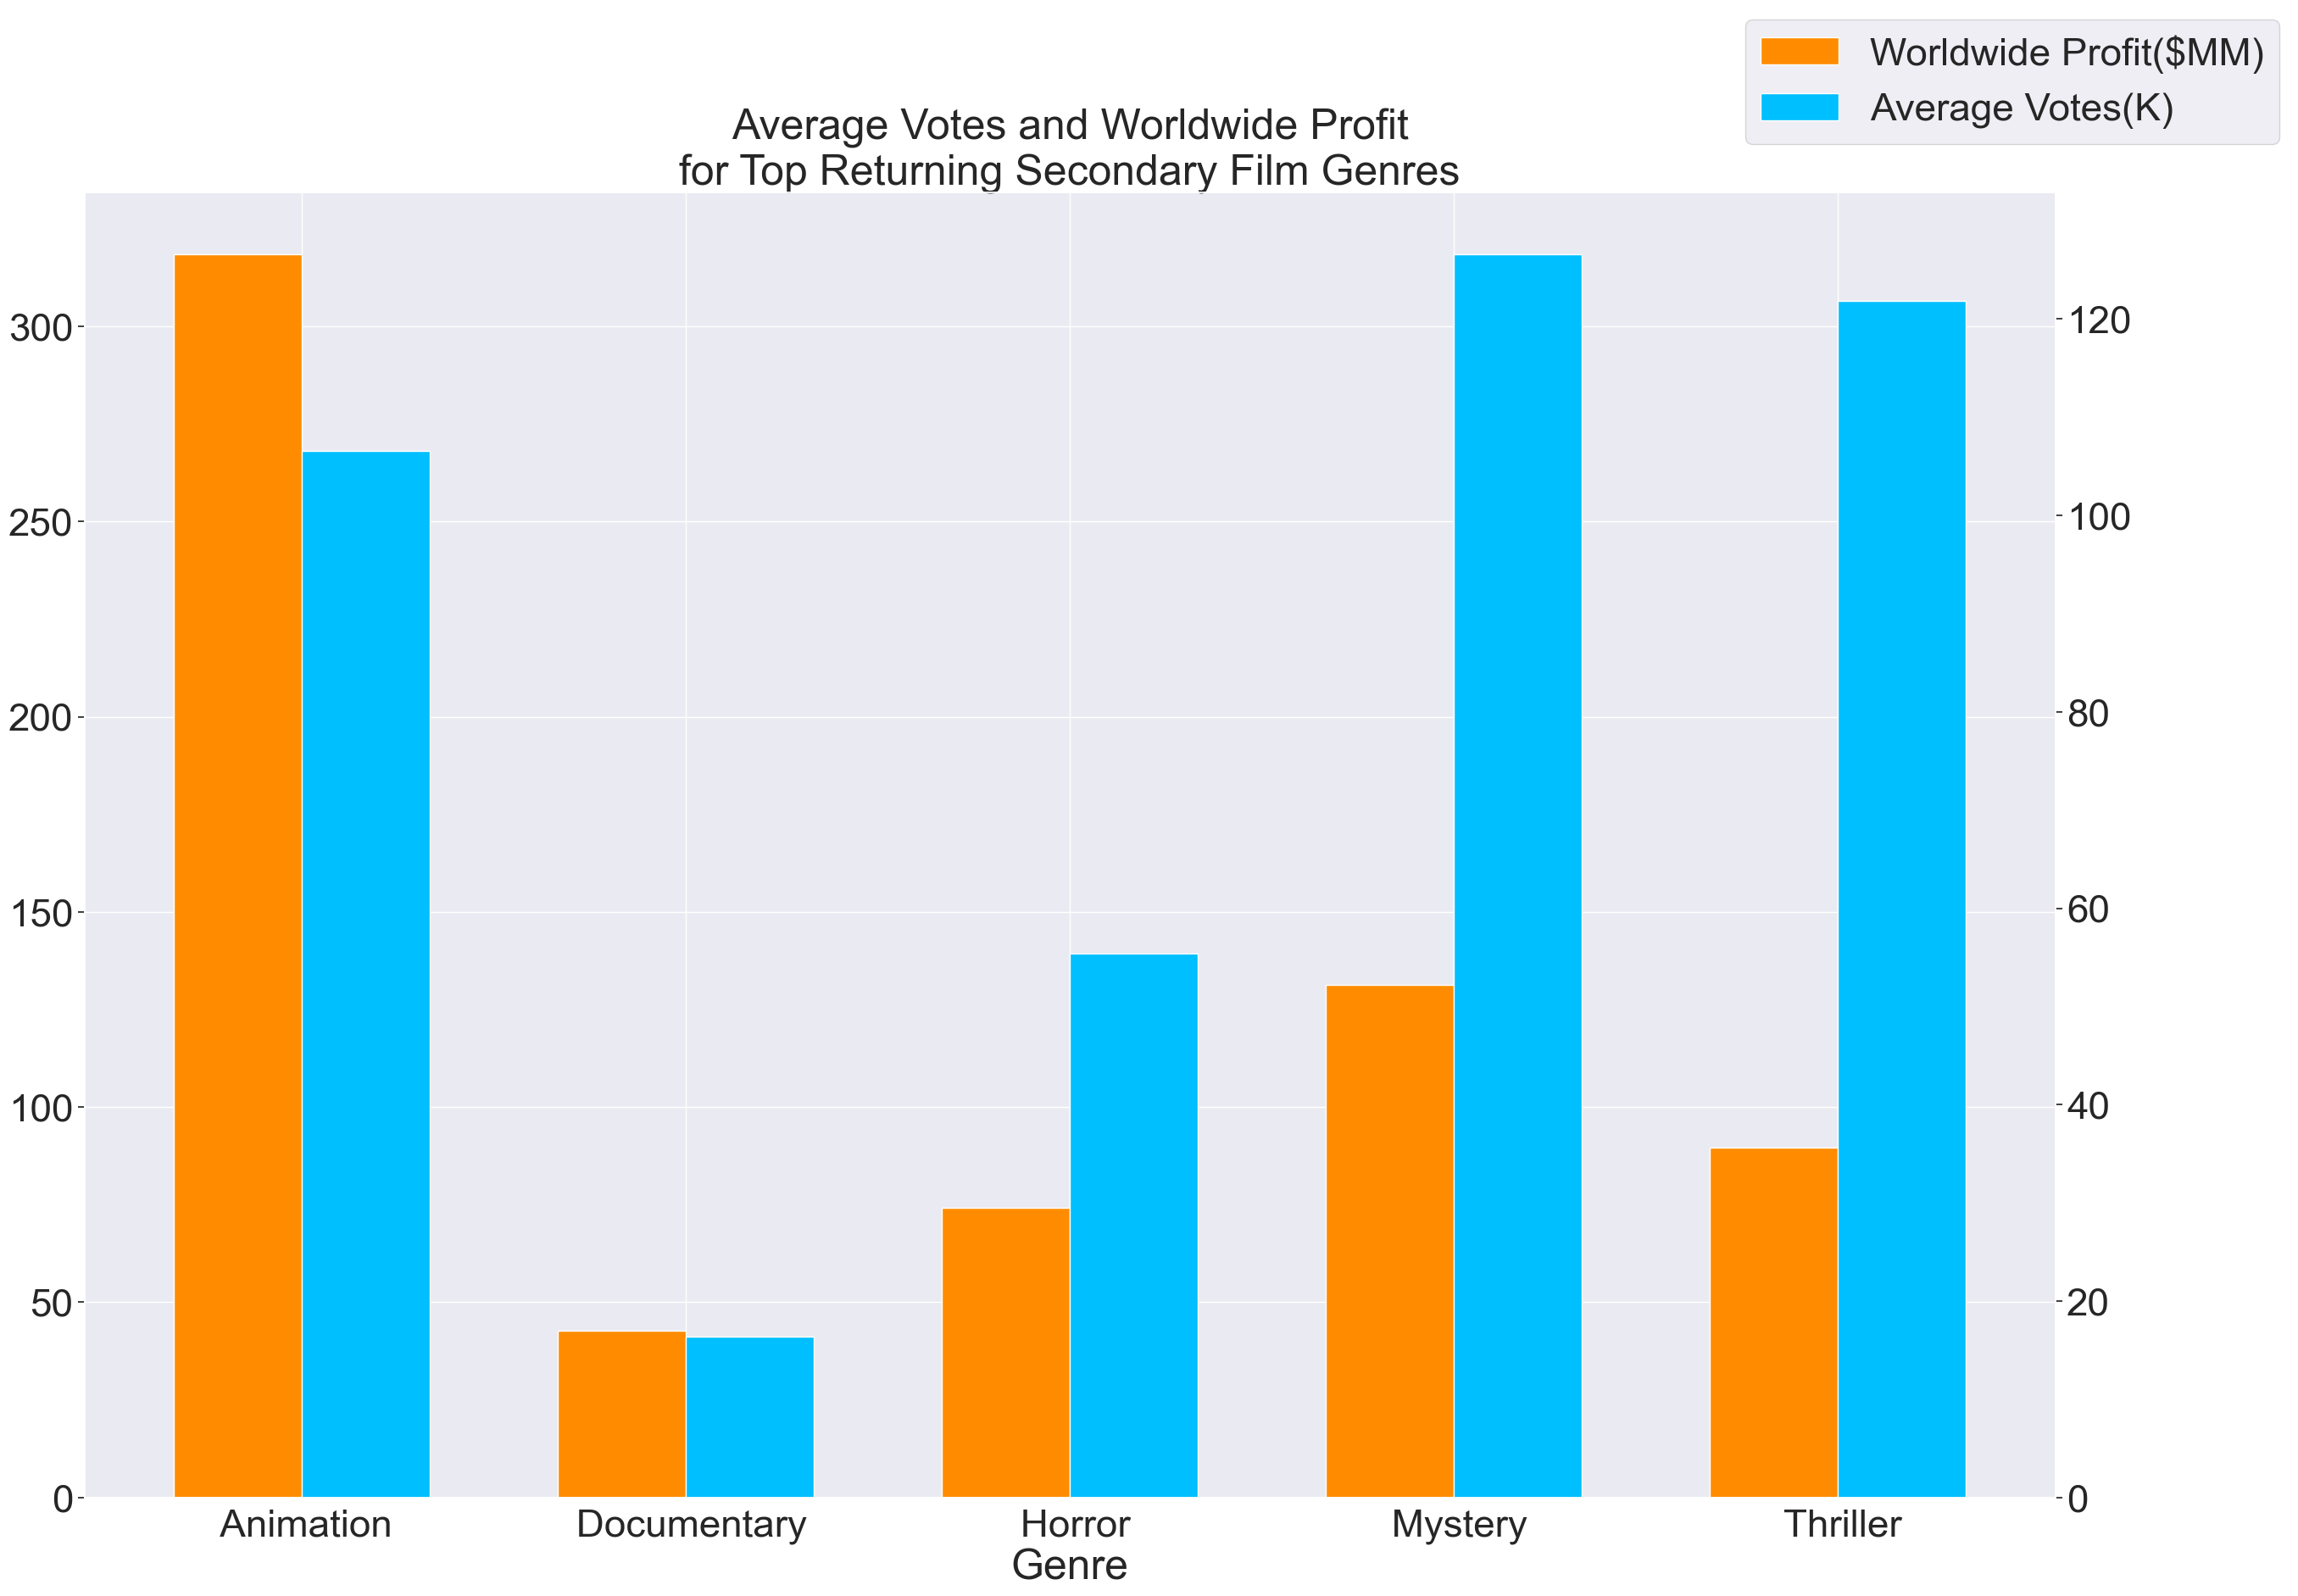

In [25]:
# Plot the Average Votes and Worldwide Profits for the Top 5 profitting secondary genres
runtimeinfo = sortsecondgenres['worldwide_gross'].sort_index()/1e6
numvoteinfo = sortsecondgenres['numvotes'].sort_index()/1e3
indices = range(len(sortsecondgenres))
genreinfo = sortsecondgenres.sort_index().index
# Calculate optimal width
width = np.min(np.diff(indices))/3.
plt.rcParams.update({'font.size': 30})
sns.set(font_scale = 3)
fig, ax1 = plt.subplots(figsize=(30,20))
ax1.bar(indices-width/2.,runtimeinfo,width,color='darkorange', label='Worldwide Profit($MM)')
ax2 = ax1.twinx()
ax2.bar(indices+width/2.,numvoteinfo,width,color='deepskyblue', label='Average Votes(K)')
# tiks = ax.get_xticks()
ax1.axes.set_xticklabels(genreinfo)
ax1.set_xlabel('Genre')
# ax1.set_ylabel('Average Worldwide Profit($MM)')
# ax2.set_ylabel('Average Number of Votes(Thousands)')
ax1.set_xticks(indices)
ax1.set_title('Average Votes and Worldwide Profit\nfor Top Returning Secondary Film Genres')
# ax1.legend(loc=2)
# ax2.legend(loc=0)
fig.legend()
ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='plain', axis='y')
ax2.grid(False)
plt.show()

Much like Animation as a primary genre, you can't go wrong with it as a secondary genre. Animation pairs well with other movie genres and brings in a significant amount of profit worldwide. Behind Mystery and Thriller, Animation is a top 3 audience favorite. 

### Profit to Budget Ratio 

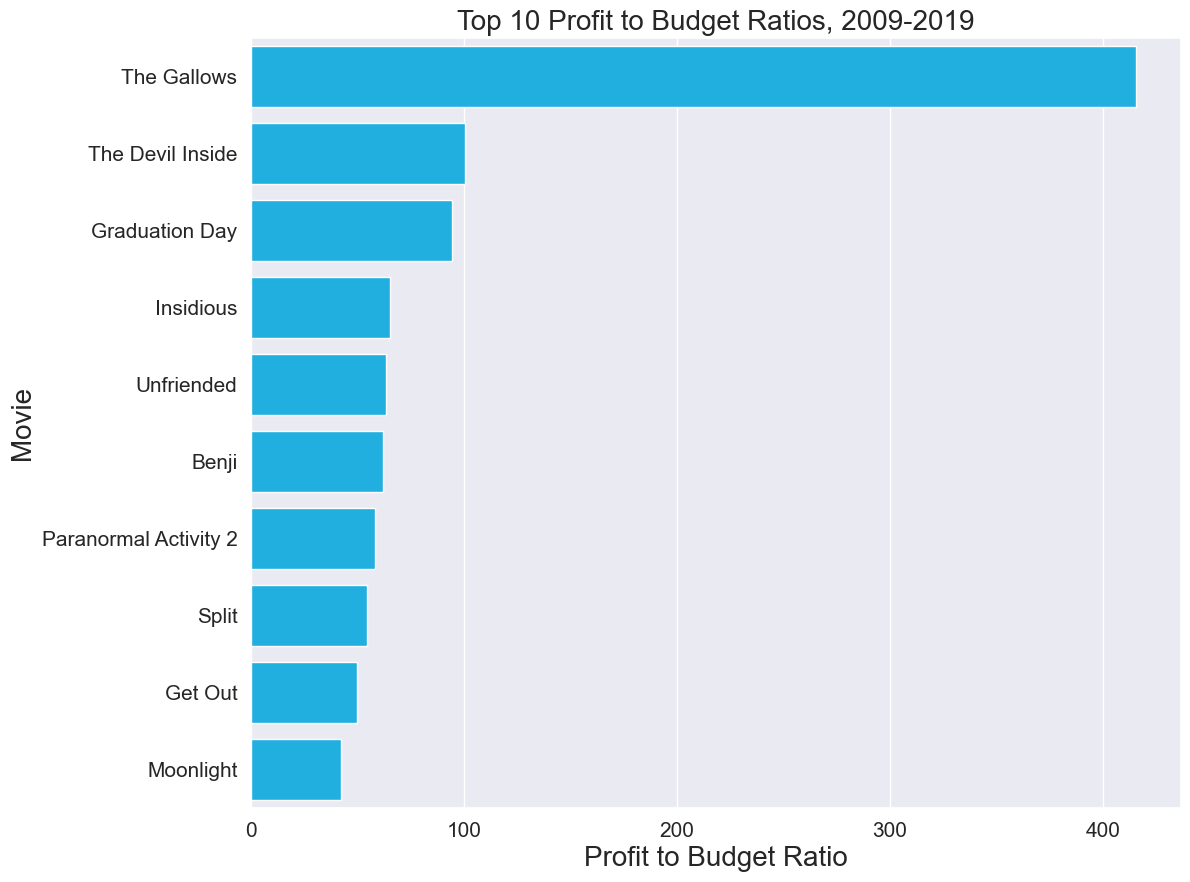

In [26]:
#Create sub-dataframe with just the Top 10 highest profit to budget ratios
top_ratio_all = final_df.sort_values(by='profit_to_budget_ratio', ascending=False).head(10)

#Plot Top 10 Profit to Budget Ratios
fig, ax = plt.subplots(figsize = (12 , 10))

fig = sns.barplot(data = top_ratio_all,
                  x = 'profit_to_budget_ratio',
                  y = 'movie',
                  color = 'deepskyblue',)

plt.xlabel('Profit to Budget Ratio', size=20)
plt.xticks(fontsize=15)
plt.ylabel('Movie', size=20)
plt.yticks(fontsize=15)
plt.title('Top 10 Profit to Budget Ratios, 2009-2019', size=20)
plt.show(fig);

Although Animation movies seem to be the most profitable. Horror movies appear to top the charts in regards of profit to budget ratio. It seems that a smaller production budget for horror movies will still be able to rake in the big bucks, like the high grossing movie The Gallows.

### Release Month Analysis

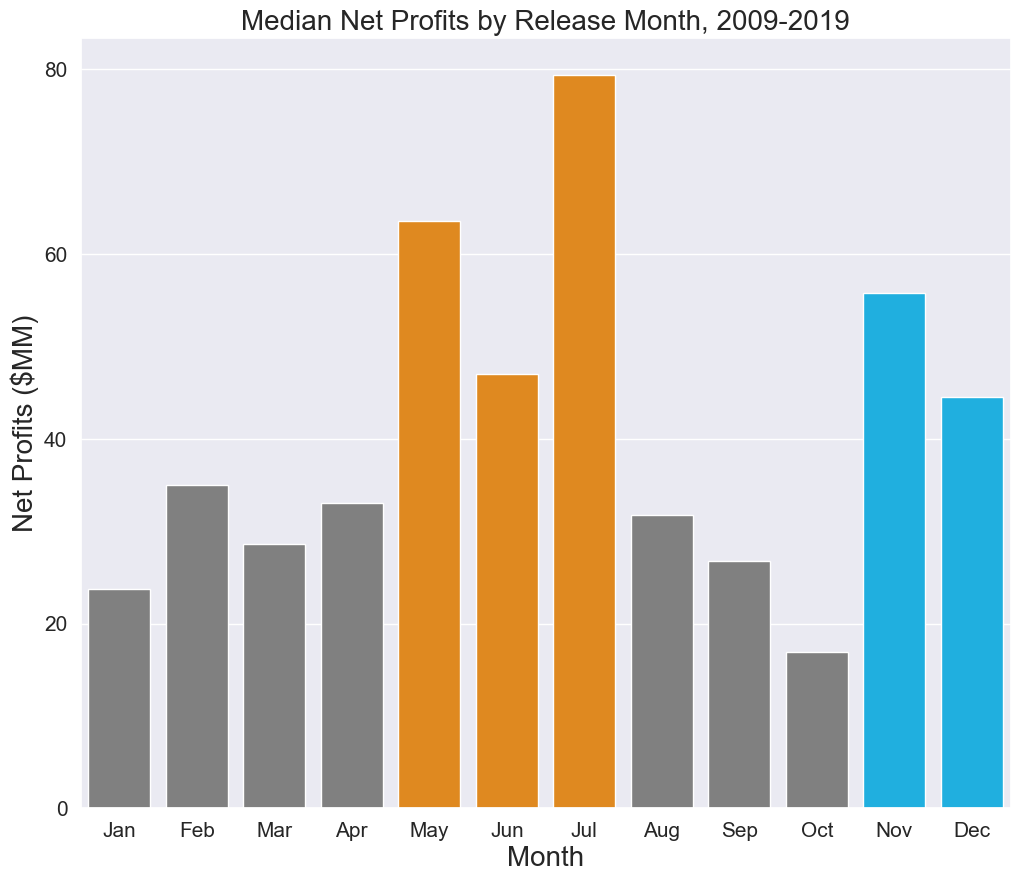

In [27]:
# Create sub-dataframe with the median values of the dataset grouped by the release month
month_medians = final_df.groupby('release_month').median()

# Reset the index
month_medians.reset_index(drop=False, inplace=True)

# Plot the Median Net Profits by Release Month
fig, ax = plt.subplots(figsize = (12 , 10))

y = month_medians['net_profits'] / 1000000
ticklabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

cols = ['gray','gray','gray','gray','darkorange','darkorange','darkorange','gray','gray','gray','deepskyblue','deepskyblue']

fig = sns.barplot(data = month_medians,
                  x = 'release_month',
                  y = y,
                  palette=cols)

plt.xlabel('Month', size=20)
ax.set_xticklabels(ticklabels, size=15)
plt.ylabel('Net Profits ($MM)', size=20)
plt.yticks(fontsize=15)
plt.title('Median Net Profits by Release Month, 2009-2019', size=20)
plt.show(fig);

It is clear that the more profitable movies are released around the Summer season, particularly in July. Alternatively, movies released in the winter around the holidays are seemingly profitable as well. If you're unable to release in the summer, aim for the winter!

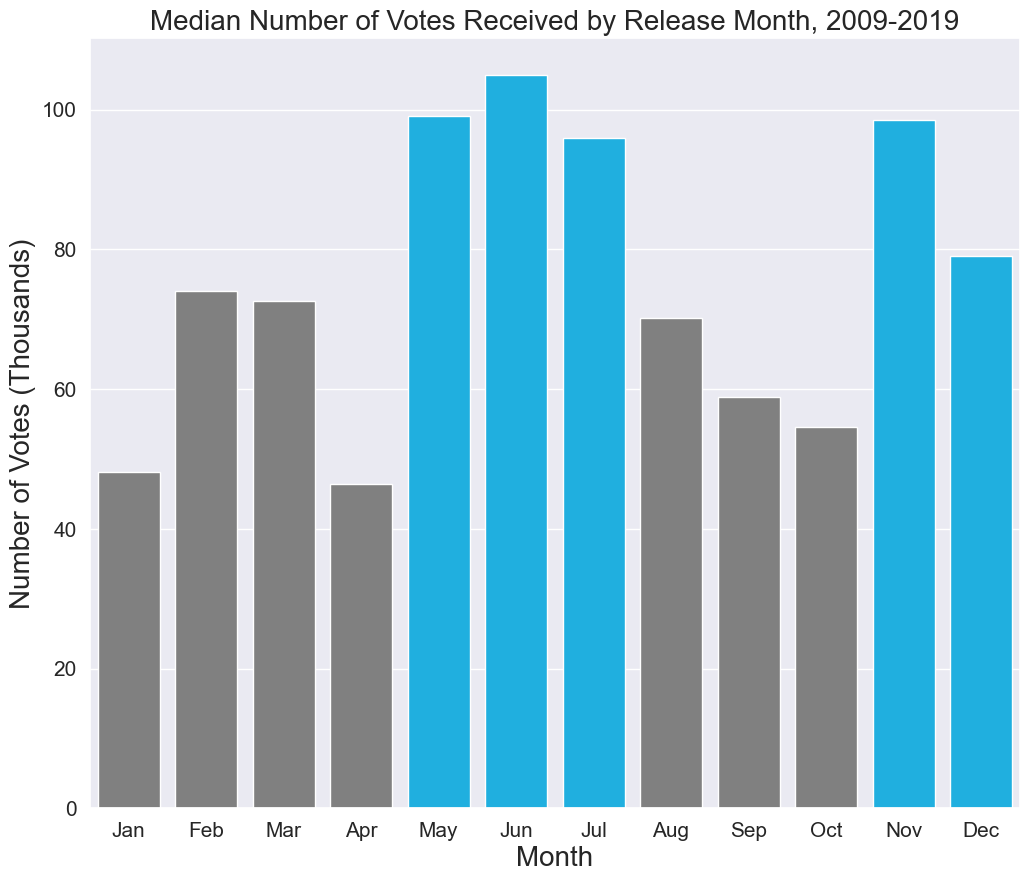

In [28]:
# Plot the Median Number of Awards Votes by Release Month between 2009-2019
fig, ax = plt.subplots(figsize = (12 , 10))

ticklabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

y = month_medians['numvotes'] / 1000

cols = ['gray' if x < 75000 else 'deepskyblue' for x in month_medians['numvotes']]

fig = sns.barplot(data = month_medians,
                  x = 'release_month',
                  y = y,
                  palette = cols)

plt.xlabel('Month', size=20)
ax.set_xticklabels(ticklabels, size=15)
plt.ylabel('Number of Votes (Thousands)', size=20)
plt.yticks(fontsize=15)
plt.title('Median Number of Votes Received by Release Month, 2009-2019', size=20)
plt.show(fig);

Much like the net profits being greater in the Summer and Winter, the number of favorable votes by audience members occur in the same months. Summer and Winter are the way to go.

### Runtime Analysis: too short, too long, or just right? 

In [29]:
# Get the descriptive statistics of the 'profit_to_budget_ratio' column
final_df['profit_to_budget_ratio'].describe()

# Locate the movie with movie with the highest profit to budget ratio
final_df.loc[final_df['profit_to_budget_ratio'] == final_df['profit_to_budget_ratio'].max()]

# Drop The Gallows movie - the movei with highest profit to budget ratio
graph_data = final_df.drop(1753)

# Reseting the dataframe index
graph_data.reset_index(inplace=True)

The Gallows movie was dropped from this dataset because the data otherwise becomes unuseable and misconstrues it, making people believe that films get much higher returns than is accurate. However this movie was an outlier. 

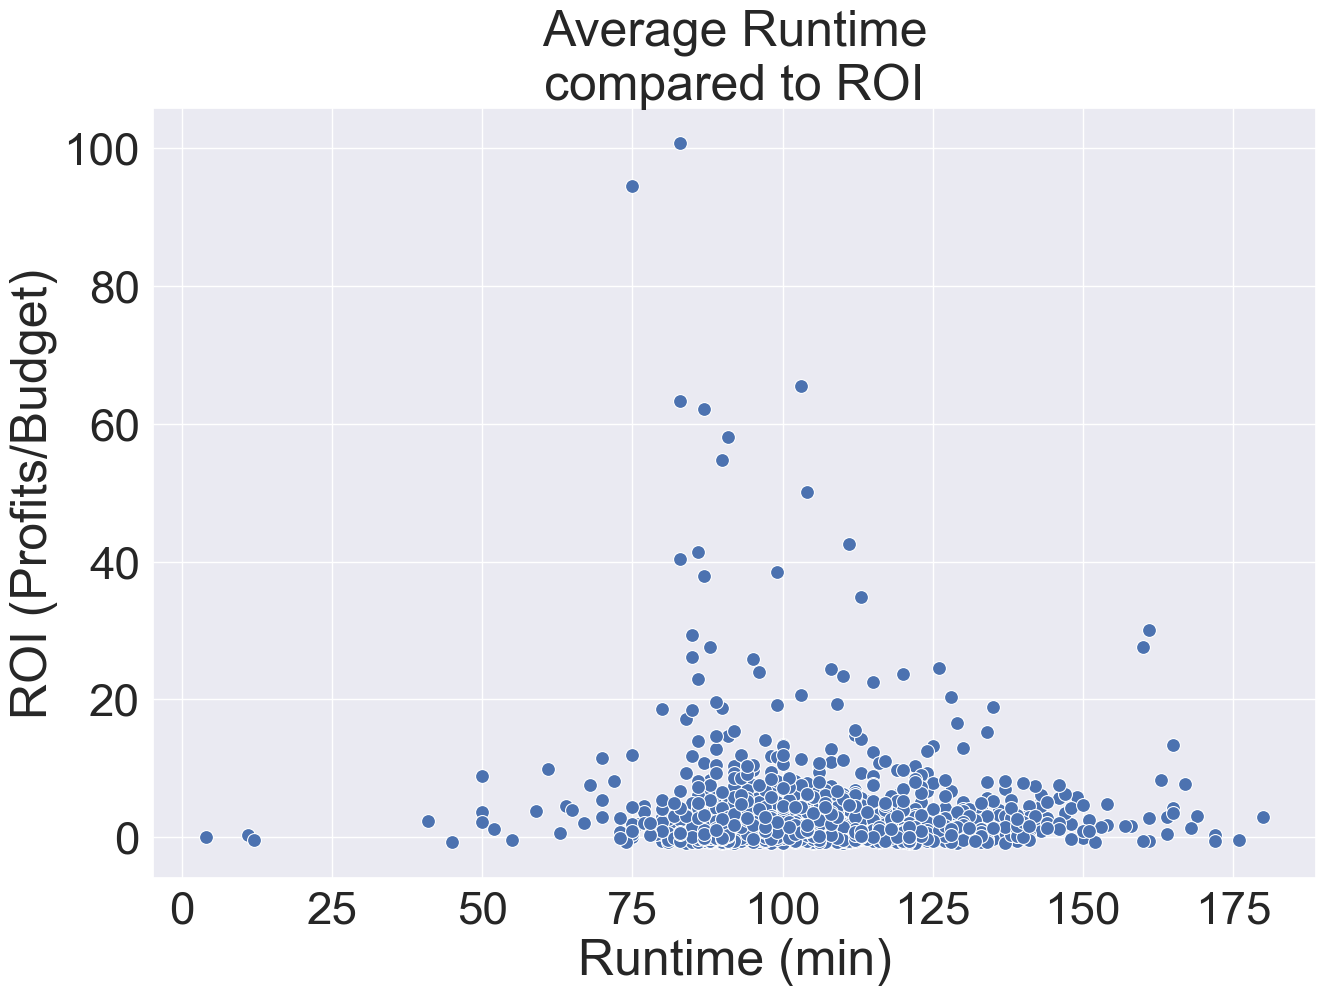

In [30]:
# Plot the run times of the movies compared to their ROI (Return on Investment) 
fig, ax = plt.subplots(figsize= (15,10))
sns.scatterplot(x=graph_data['runtime_minutes'], y=graph_data['profit_to_budget_ratio'], s=100) 
ax.set_title('Average Runtime\ncompared to ROI')
ax.set_ylabel('ROI (Profits/Budget)')
ax.set_xlabel('Runtime (min)')
ax.ticklabel_format(style='plain', axis='y')
plt.show()

Even though 15 second short clips are on the rise on social media, it seems that the length of movie does not have affect on a movie's profitability. Whether a movie is one hour or two hours long, there seems to be no correlation with the return on investments. A majority of the movies released within the dataset are between 75 and 150 minutes within a similar ROI range. However, it is clear that there are certain outliers. 

In [31]:
# Create sub-dataframe with the median values of the dataset grouped by run time values
labels = range(10)
values = pd.cut(final_df['runtime_minutes'], bins=30)
new_set = final_df.join(values, rsuffix='_values')
runtimegrouped = new_set.groupby('runtime_minutes_values').median()
runtimegrouped

,production_budget,domestic_gross,worldwide_gross,runtime_minutes,averagerating,numvotes,release_year,net_profits,profit_to_budget_ratio
runtime_minutes_values,,,,,,,,,
"(3.824, 9.867]",10100000.00000,10143618.00000,10143618.00000,4.00000,NaN,NaN,2014.00000,43618.00000,0.00432
"(9.867, 15.733]",28500000.00000,27087393.00000,33431578.50000,11.50000,NaN,NaN,2012.00000,4931578.50000,-0.01092
"(15.733, 21.6]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(21.6, 27.467]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(27.467, 33.333]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(33.333, 39.2]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(39.2, 45.067]",17500000.00000,5907339.00000,13306012.00000,43.00000,7.75000,205.00000,2014.00000,-4193988.00000,0.81980
"(45.067, 50.933]",30000000.00000,71628180.00000,148095566.00000,50.00000,5.80000,11.00000,2013.00000,133095566.00000,3.59725
"(50.933, 56.8]",16000000.00000,21336869.50000,25105671.50000,53.50000,NaN,NaN,2012.50000,9105671.50000,0.36450


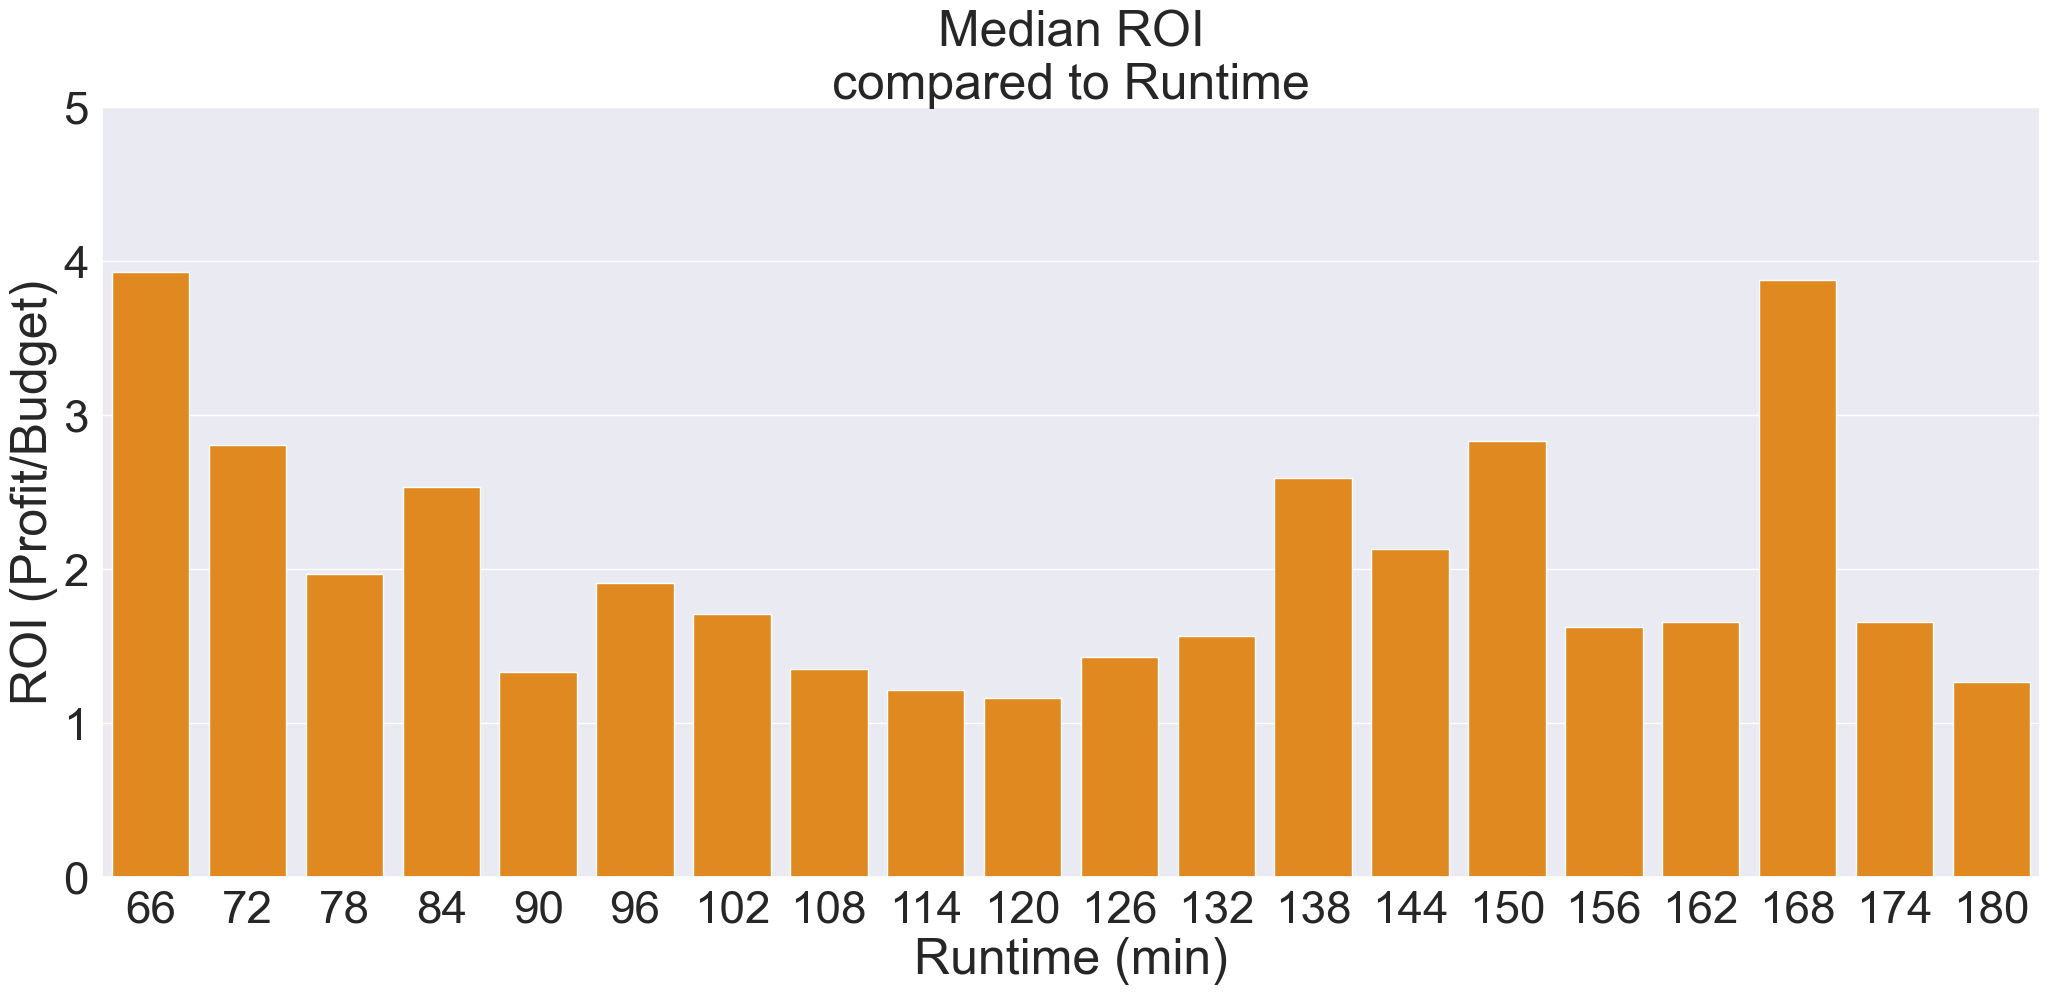

In [32]:
#Plot the Median Return on Investment compared to movie Run time 
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(x=[(x+1)*6 for x in range(len(runtimegrouped))],
y=runtimegrouped['profit_to_budget_ratio'], color='darkorange',label='ROI (Profit/Budget)')
ax.set_ylim([0,5])
ax.set_xlim([9.5,29.5])#only looking at the top 75% of runtimes
ax.set_title('Median ROI\ncompared to Runtime')
ax.set_ylabel('ROI (Profit/Budget)')
ax.set_xlabel('Runtime (min)')
sns.set_style("darkgrid")
plt.show()

The steady difference in ROI compared to run time shows that there is not a clear correlation and effect that run time has on the profitability of a movie.

## Conclusion
* **Focus on an Animation Genre Movie**
    * This genre of movie was shown to have the highest profitability, including worldwide gross, net profit, profit to production cost ratio. It has received on average received a high number of votes in terms of audience and critic ratings, indicating its popularity. Due to their typically kid-friendly nature, the potential audience range for animated movies typically spans across the largest age range.

* **Released the Movie in the Summer or Right Before the Winter Holidays**
    * Movies released around these seasons profited the most. The months of May, June, and July in particular are very successful release months. The second best time is either November or December. Movie awards season typically begins late in the year in the United States and release of a movie before the winter holidays will get your movie in the running just in time. These time periods are generally a time when children are out of school and adults will have time off of work as a result of vacation or holiday leave. 

* **Do not be overly concerned with movie Run Time**
    * There is no strong correlation with profitability or Return on Investment when comparing short vs. long run times. However, audiences do seem to prefer movies either on the shorter side or to strap themselves in for a 2.5 hour epic. If the movie concept captures the audience's attention, they'll be glued to their seats to watch it for the entire duration.
    
From the start, our focal point was profit. As such, we believe these results would benefit Microsoft should they be taken into consideration. The formula for making money from movies appears to rely on the genre and release date, with the added bonus that the right genre and right release date leads to a well-received movie.

### Future Insights & Next Steps
   * Look into Streaming vs. Box office performance for genres.
   * Explore a potential partnership with Microsoft's Gaming Division to handle animation needs.
   * Determine if any particular actor, director, or writer has an impact on profits or popularity.
   * Compare the data with historical data trends to see if audience preferences have changed over time.